In [7]:
pip install geopandas rasterio rasterstats matplotlib pandas

  Obtaining dependency information for rasterio from https://files.pythonhosted.org/packages/7e/1f/56462740694de764fde264051224fcbf800dad43cac92a66753153128866/rasterio-1.4.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for rasterstats from https://files.pythonhosted.org/packages/5e/0b/bd73621d2a5f87da97158c5c77a4bf31e27d60cf6bcc6ddea532043cc21d/rasterstats-0.20.0-py3-none-any.whl.metadata
  Obtaining dependency information for affine from https://files.pythonhosted.org/packages/0b/f7/85273299ab57117850cc0a936c64151171fac4da49bc6fba0dad984a7c5f/affine-2.4.0-py3-none-any.whl.metadata
  Obtaining dependency information for cligj>=0.5 from https://files.pythonhosted.org/packages/73/86/43fa9f15c5b9fb6e82620428827cd3c284aa933431405d1bcf5231ae3d3e/cligj-0.7.2-py3-none-any.whl.metadata
  Obtaining dependency information for click-plugins from https://files.pythonhosted.org/packages/3d/9a/2abecb28ae875e39c8cad711eb1186d8d14eab564705325e77e4e6ab9ae5/click_plugins-1.1.1.

In [28]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from rasterstats import zonal_stats

raster = r"C:\Users\santi\OneDrive\Documentos\GitHub\Peru-Minimum-Temperature-Raster-Analysis\data\tmin_raster.tif"
shp = r"C:\Users\santi\OneDrive\Documentos\GitHub\Peru-Minimum-Temperature-Raster-Analysis\data\distritos\DISTRITOS.shp"
gdf = gpd.read_file(shp)
gdf

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.3171 -9.2975..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...,...,...,...,...,...,...,...,...,...
1868,10,HUANUCO,1006,LEONCIO PRADO,100608,CASTILLO GRANDE,CASTILLO GRANDE,0001,1,INEI,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,10,HUANUCO,1006,LEONCIO PRADO,100609,PUEBLO NUEVO,PUEBLO NUEVO,0001,1,INEI,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,10,HUANUCO,1006,LEONCIO PRADO,100610,SANTO DOMINGO DE ANDA,PACAE,0001,1,INEI,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,21,PUNO,2111,SAN ROMAN,211105,SAN MIGUEL,SAN MIGUEL,0001,1,INEI,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


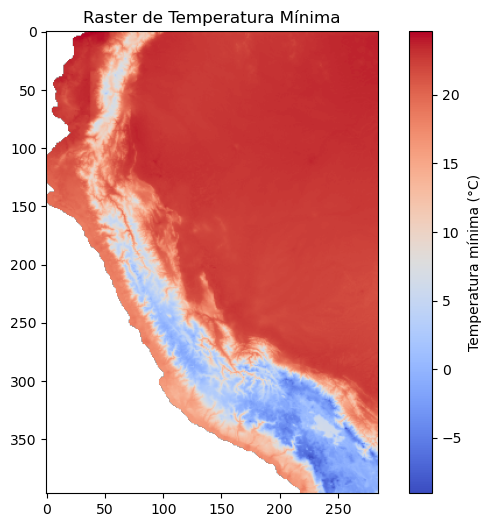

In [25]:
import rasterio
import matplotlib.pyplot as plt

# Ruta al archivo
raster_path = r"C:\Users\santi\Downloads\tmin_raster.tif"

# Abrir el raster
with rasterio.open(raster_path) as src:
    raster = src.read(1)

# Mostrar como imagen
plt.figure(figsize=(8, 6))
plt.imshow(raster, cmap="coolwarm") 
plt.colorbar(label="Temperatura mínima (°C)")
plt.title("Raster de Temperatura Mínima")
plt.show()

In [43]:
from rasterio.mask import mask
import geopandas as gpd
import rasterio


with rasterio.open(raster_path) as src:
    gdf = gdf.to_crs("EPSG:4326")

    out_image, out_transform = mask(src, gdf.geometry, crop=True)
    out_meta = src.meta.copy()

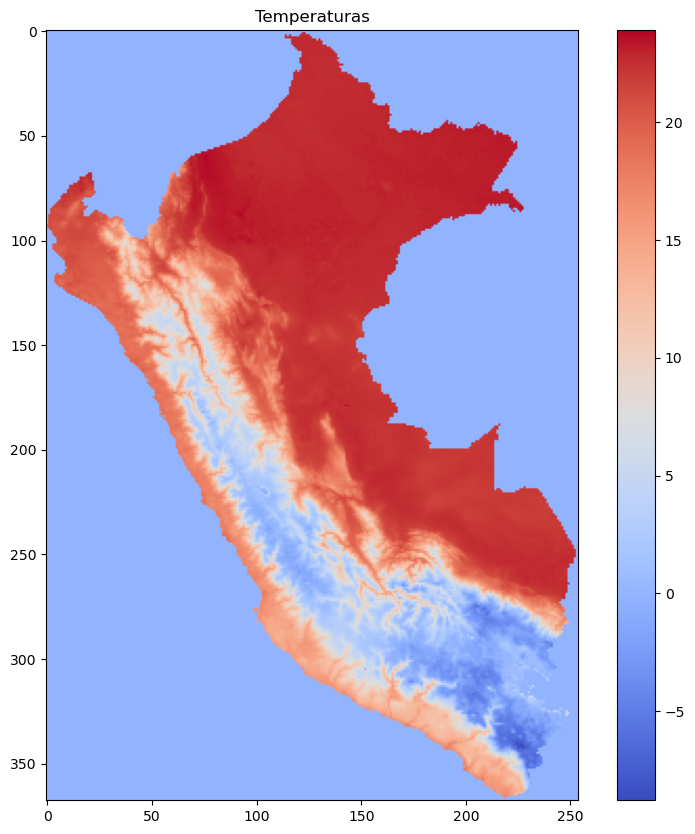

In [42]:
plt.figure(figsize=(10, 10))
plt.imshow(out_image[0], cmap='coolwarm')
plt.title("Temperaturas")
plt.colorbar()
plt.show()

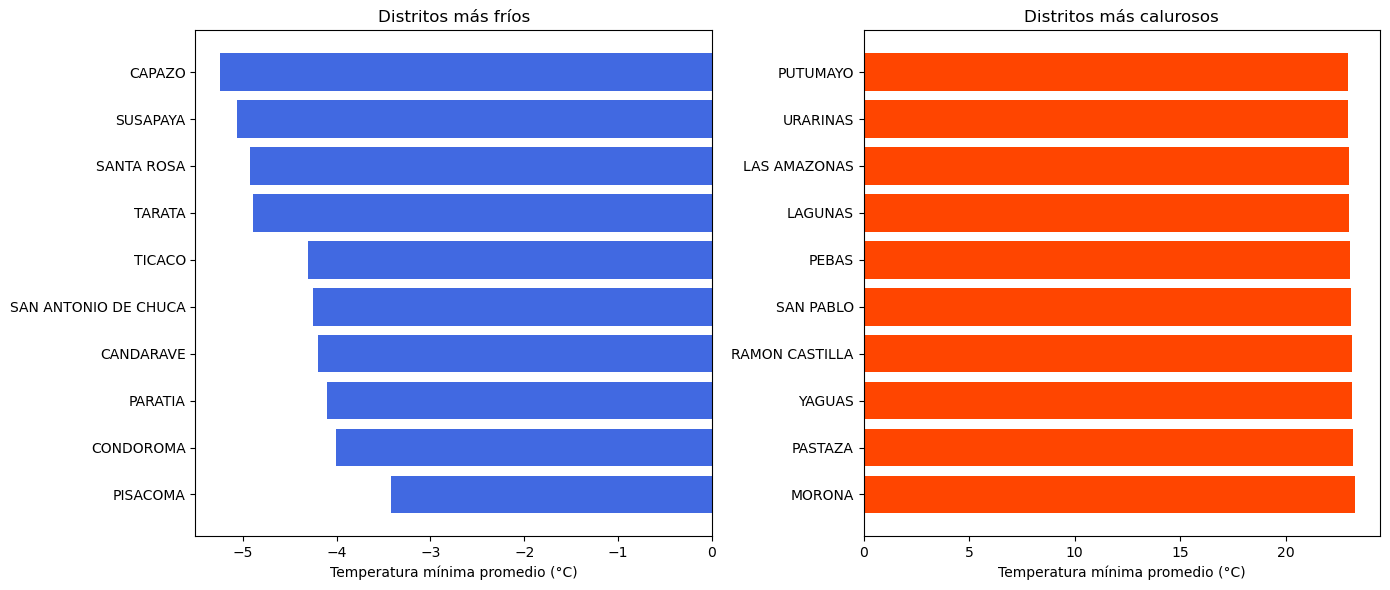

In [50]:
df = pd.DataFrame(stats)
df["DISTRITO"] = gdf["DISTRITO"]
df = df.dropna(subset=["mean"])

df_sorted = df.sort_values("mean", ascending=True)

top_frios = df_sorted.head(10)
top_calidos = df_sorted.tail(10)



fig, axs = plt.subplots(1, 2, figsize=(14, 6))
axs[0].barh(top_frios["DISTRITO"], top_frios["mean"], color="royalblue")
axs[0].set_title("Distritos más fríos")
axs[0].set_xlabel("Temperatura mínima promedio (°C)")
axs[0].invert_yaxis()

axs[1].barh(top_calidos["DISTRITO"], top_calidos["mean"], color="orangered")
axs[1].set_title("Distritos más calurosos")
axs[1].set_xlabel("Temperatura mínima promedio (°C)")
axs[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [ ]:
stats = zonal_stats(
    gdf,
    raster,
    stats=["mean"])

#Dataframe
df = pd.DataFrame(stats)
df["DISTRITO"] = gdf["DISTRITO"]
df = df.round(2).sort_values("mean")

#Gráfico
plt.figure(figsize=(9, 6))
plt.barh(df["DISTRITO"], df["mean"], color="steelblue")
plt.title("Temperatura mínima media por departamento (°C)")
plt.xlabel("Temperatura (°C)")
plt.tight_layout()
plt.show()

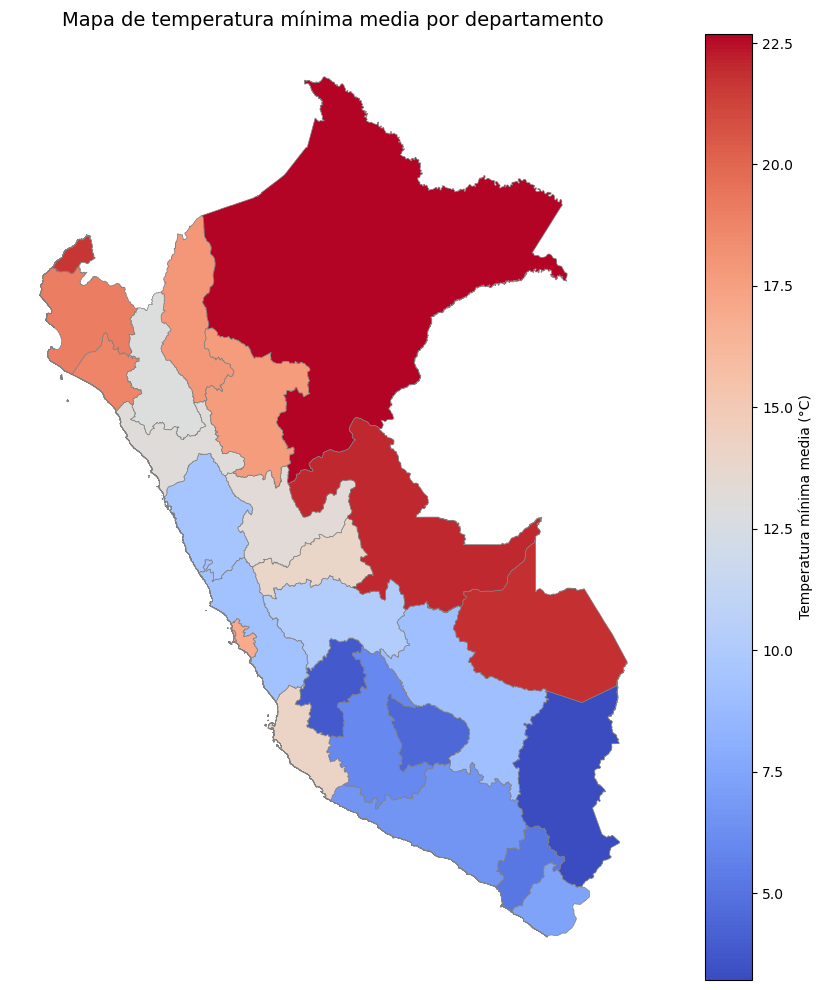

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

gdf_plot = gdf.merge(df, left_on="NAME_1", right_on="DEPARTAMENTO")

#Crear mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf_plot.plot(
    column="mean",                 
    cmap="coolwarm",         
    linewidth=0.5,
    edgecolor="gray",
    legend=True,
    legend_kwds={"label": "Temperatura mínima media (°C)"},
    ax=ax
)

ax.set_title("Mapa de temperatura mínima media por departamento", fontsize=14)
ax.axis("off")

plt.tight_layout()
plt.show()
